<a href="https://colab.research.google.com/github/Kimjibeom/Project_Book/blob/main/%EC%9E%85%EB%A0%A5_%ED%82%A4%EC%9B%8C%EB%93%9C_%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive 마운트 하기





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#경로 설정
import os
os.chdir('/content/drive/My Drive/')

In [3]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 깨짐 방지
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/content/drive/MyDrive/data/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [5]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 49.4 MB/s 
     |████████████████████████████████| 86 kB 8.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


# 키워드 추출

텍스트 데이터 전처리

In [6]:
df = pd.read_csv('/content/drive/MyDrive/data/book_data.csv', encoding='cp949')
df.head()

,bid,title,writer,publisher,publishDate,intro,category,image
0,20844891,달러구트 꿈 백화점 12 세트전2권,이미예,팩토리나인,2021.7.27,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...,소설,https://bookthumb-phinf.pstatic.net/cover/208/...
1,10624152,거기 내가 가면 안 돼요2,이금이,사계절\n,2020.12.31,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...,소설,https://bookthumb-phinf.pstatic.net/cover/106/...
2,11931111,인간행동과 사회환경,"장수한, 김현주, 임혁, 채인숙",공동체\n,2020.7.30,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...,사회,https://bookthumb-phinf.pstatic.net/cover/119/...
3,12518812,평화사상과 통일의 길,"박균열, 이원봉, 강명진, 방원석, 임여진, 전찬영",경상대학교출판부\n,2020.11.6,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...,사회,https://bookthumb-phinf.pstatic.net/cover/125/...
4,14450596,프리드리히키틀러큰글씨책이론총서,유현주,커뮤니케이션북스\n,2020.11.15,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독...",사회,https://bookthumb-phinf.pstatic.net/cover/144/...


In [7]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [8]:
# ‘title’ 피처에 이를 적용합니다.
df['ko_title'] = df['title'].apply(lambda x: text_cleaning(x))
df.head()

,bid,title,writer,publisher,publishDate,intro,category,image,ko_title
0,20844891,달러구트 꿈 백화점 12 세트전2권,이미예,팩토리나인,2021.7.27,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...,소설,https://bookthumb-phinf.pstatic.net/cover/208/...,달러구트 꿈 백화점 세트전권
1,10624152,거기 내가 가면 안 돼요2,이금이,사계절\n,2020.12.31,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...,소설,https://bookthumb-phinf.pstatic.net/cover/106/...,거기 내가 가면 안 돼요
2,11931111,인간행동과 사회환경,"장수한, 김현주, 임혁, 채인숙",공동체\n,2020.7.30,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...,사회,https://bookthumb-phinf.pstatic.net/cover/119/...,인간행동과 사회환경
3,12518812,평화사상과 통일의 길,"박균열, 이원봉, 강명진, 방원석, 임여진, 전찬영",경상대학교출판부\n,2020.11.6,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...,사회,https://bookthumb-phinf.pstatic.net/cover/125/...,평화사상과 통일의 길
4,14450596,프리드리히키틀러큰글씨책이론총서,유현주,커뮤니케이션북스\n,2020.11.15,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독...",사회,https://bookthumb-phinf.pstatic.net/cover/144/...,프리드리히키틀러큰글씨책이론총서


In [9]:
# ‘intro’ 피처에 이를 적용합니다.
df['ko_intro'] = df['intro'].apply(lambda x: text_cleaning(x))
df.head()

,bid,title,writer,publisher,publishDate,intro,category,image,ko_title,ko_intro
0,20844891,달러구트 꿈 백화점 12 세트전2권,이미예,팩토리나인,2021.7.27,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...,소설,https://bookthumb-phinf.pstatic.net/cover/208/...,달러구트 꿈 백화점 세트전권,달러구트 꿈 백화점 주문하신 꿈은 매진입니다잠들어야만 입장할 수 있는 독특한 마을...
1,10624152,거기 내가 가면 안 돼요2,이금이,사계절\n,2020.12.31,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...,소설,https://bookthumb-phinf.pstatic.net/cover/106/...,거기 내가 가면 안 돼요,청소년문학의 아이콘 이금이 작가가 작가 생활 년 만에 처음 쓴 역사소설 논 서 마지...
2,11931111,인간행동과 사회환경,"장수한, 김현주, 임혁, 채인숙",공동체\n,2020.7.30,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...,사회,https://bookthumb-phinf.pstatic.net/cover/119/...,인간행동과 사회환경,이 책은 인간행동과 사회환경을 다룬 이론서입니다 인간행동과 사회환경의 기초적이고 ...
3,12518812,평화사상과 통일의 길,"박균열, 이원봉, 강명진, 방원석, 임여진, 전찬영",경상대학교출판부\n,2020.11.6,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...,사회,https://bookthumb-phinf.pstatic.net/cover/125/...,평화사상과 통일의 길,평화사상과 통일의 길은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명한다...
4,14450596,프리드리히키틀러큰글씨책이론총서,유현주,커뮤니케이션북스\n,2020.11.15,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독...",사회,https://bookthumb-phinf.pstatic.net/cover/144/...,프리드리히키틀러큰글씨책이론총서,프리드리히 키틀러큰글씨책 은 기록체계 정보 저장의 네트워크 문자 독점 시대 축음기와...


In [10]:
from konlpy.tag import Okt
from collections import Counter

# 한국어 약식 불용어사전
korean_stopwords_path = "/content/drive/MyDrive/data/stopword.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [11]:
df['nouns'] = df['ko_intro'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(10871, 11)


,bid,title,writer,publisher,publishDate,intro,category,image,ko_title,ko_intro,nouns
0,20844891,달러구트 꿈 백화점 12 세트전2권,이미예,팩토리나인,2021.7.27,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...,소설,https://bookthumb-phinf.pstatic.net/cover/208/...,달러구트 꿈 백화점 세트전권,달러구트 꿈 백화점 주문하신 꿈은 매진입니다잠들어야만 입장할 수 있는 독특한 마을...,"[달러, 구트, 백화점, 주문, 매진, 입장, 마을, 손님, 인기, 온갖, 판매, ..."
1,10624152,거기 내가 가면 안 돼요2,이금이,사계절\n,2020.12.31,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...,소설,https://bookthumb-phinf.pstatic.net/cover/106/...,거기 내가 가면 안 돼요,청소년문학의 아이콘 이금이 작가가 작가 생활 년 만에 처음 쓴 역사소설 논 서 마지...,"[청소년, 문학, 아이콘, 생활, 처음, 역사소설, 마지기, 자작, 채령, 생일, ..."
2,11931111,인간행동과 사회환경,"장수한, 김현주, 임혁, 채인숙",공동체\n,2020.7.30,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...,사회,https://bookthumb-phinf.pstatic.net/cover/119/...,인간행동과 사회환경,이 책은 인간행동과 사회환경을 다룬 이론서입니다 인간행동과 사회환경의 기초적이고 ...,"[인간, 행동, 사회, 환경, 이론, 인간, 행동, 사회, 환경, 학습]"
3,12518812,평화사상과 통일의 길,"박균열, 이원봉, 강명진, 방원석, 임여진, 전찬영",경상대학교출판부\n,2020.11.6,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...,사회,https://bookthumb-phinf.pstatic.net/cover/125/...,평화사상과 통일의 길,평화사상과 통일의 길은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명한다...,"[평화, 사상, 통일, 평화, 사상, 바탕, 한반도, 통일, 설명, 그리스도교, 유..."
4,14450596,프리드리히키틀러큰글씨책이론총서,유현주,커뮤니케이션북스\n,2020.11.15,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독...",사회,https://bookthumb-phinf.pstatic.net/cover/144/...,프리드리히키틀러큰글씨책이론총서,프리드리히 키틀러큰글씨책 은 기록체계 정보 저장의 네트워크 문자 독점 시대 축음기와...,"[프리드리히, 키틀러, 글씨, 기록, 체계, 정보, 저장, 네트워크, 문자, 독점,..."


In [12]:
from gensim.models import Word2Vec

In [13]:
clean_token_index = list(df['ko_intro'])  #형태소 리스트 형태로 변환
cleaned_sentences = []
for sentence in clean_token_index: 
    token = sentence.split(' ')
    cleaned_sentences.append(token)
print(cleaned_sentences[0])
print(type(cleaned_sentences[0]))

['달러구트', '꿈', '백화점', '', '주문하신', '꿈은', '매진입니다잠들어야만', '입장할', '수', '있는', '독특한', '마을', '그곳에', '들어온', '잠든', '손님들에게', '가장', '인기', '있는', '곳은', '온갖', '꿈을', '한데', '모아', '판매하는', '달러구트의', '꿈', '백화점이다', '긴', '잠을', '자는', '사람들은', '물론이고', '짧은', '낮잠을', '자는', '사람들과', '동물들로', '매일매일', '대성황을', '이룬다달러구트', '꿈', '백화점', '', '', '단골손님을', '찾습니다만', '독자를', '사로잡은', '달러구트', '꿈', '백화점', '그', '두', '번째', '이야기', '어느덧', '페니가', '달러구트', '꿈', '백화점에서', '일한', '지도', '년이', '넘었다', '재고가', '부족한', '꿈을', '관리하고', '꿈값', '창고에서', '감정으로', '가득', '찬', '병을', '옮기고', '프런트의', '수많은', '눈꺼풀', '저울을', '관리하는', '일에', '능숙해진', '페니는', '자신감이', '넘친다', '게다가', '꿈', '산업', '종사자로', '인정을', '받아야만', '드나들', '수', '있는', '컴퍼니', '구역에도', '가게', '된', '페니는', '기쁜', '마음을', '감출', '수', '없다']
<class 'list'>


In [14]:
#gensim에 있는 Word2Vec 모델 사용(그냥 문장이 아닌 형태소로 잘린 문장을 부여해야함)
embedding_model = Word2Vec(cleaned_sentences, size=100, window=4, min_count=20,workers=4,iter=100,sg=1) 
#size:차원 window:conv레이어의 필터사이즈 (앞뒤 문맥을 어느만큼까지 볼 것인지) min_count:20번 이상 출현하지 않는 단어는 버림 
embedding_model.save('/content/drive/MyDrvie/data') #다시 쓸 수 있게 모델을 저장

FileNotFoundError: ignored

In [15]:
print(embedding_model.wv.vocab.keys())
print(len(embedding_model.wv.vocab.keys()))

dict_keys(['꿈', '', '꿈은', '수', '있는', '독특한', '마을', '그곳에', '들어온', '가장', '인기', '곳은', '온갖', '꿈을', '한데', '모아', '긴', '자는', '사람들은', '물론이고', '짧은', '사람들과', '독자를', '사로잡은', '그', '두', '번째', '이야기', '어느덧', '지도', '년이', '부족한', '가득', '찬', '병을', '옮기고', '수많은', '관리하는', '일에', '게다가', '산업', '인정을', '가게', '된', '기쁜', '마음을', '없다', '작가가', '작가', '생활', '년', '만에', '처음', '쓴', '서', '딸', '되어', '작은', '오게', '복잡한', '운명의', '하며', '일본', '미국', '러시아', '중국', '등으로', '이어지는', '여정에', '성별', '문화', '차이를', '온몸으로', '시절', '사람들의', '인생', '생생하게', '펼쳐진다', '이', '책은', '다룬', '이론서입니다', '기초적이고', '전반적인', '내용을', '학습할', '있도록', '구성했습니다', '통일의', '길은', '바탕으로', '왜', '설명한다', '유교', '담긴', '통해', '각', '한반도의', '평화', '회복과', '통일에', '어떤', '기여를', '할', '분석하고', '있다', '부분에', '대한', '내용', '이루어졌다', '또한', '저자는', '전', '세계가', '평화에', '한', '발', '더', '위한', '다양한', '이론들을', '제시하고', '있는데', '그중', '설명한', '부분은', '전쟁', '평화와', '거리가', '전쟁이', '현실적으로', '하는지를', '정의로운', '전쟁의', '기원과', '이외에', '활동과', '주목하고', '마지막으로', '이루기', '이론적', '배경을', '연구를', '소개하고', '통일을', '이룬', '사례를', '이를', '한반도', '주는', 

In [40]:
key_word = '사회','정치','경제'
sim_word = embedding_model.wv.most_similar(key_word,topn=30)
print(sim_word)

[('문화', 0.6672510504722595), ('초석으로서', 0.6166729927062988), ('교육', 0.5460124015808105), ('문화와', 0.5459031462669373), ('환경', 0.5395480990409851), ('학계를', 0.525364100933075), ('국가', 0.5253171920776367), ('문화를', 0.521767795085907), ('오늘날', 0.5179325342178345), ('불평등', 0.5158360600471497), ('변화', 0.514521062374115), ('사회와', 0.513679027557373), ('제도', 0.5124373435974121), ('젠더', 0.5110095739364624), ('정치와', 0.5100708603858948), ('정책', 0.50527423620224), ('역사', 0.4971940517425537), ('사회의', 0.49315062165260315), ('발전', 0.4930010139942169), ('대외', 0.49183741211891174), ('권력', 0.4885229468345642), ('환경의', 0.485740065574646), ('발전을', 0.4834374189376831), ('종교', 0.4831058979034424), ('사회적', 0.48092660307884216), ('돌아간', 0.4802292585372925), ('우리나라의', 0.4789348840713501), ('기술', 0.47855323553085327), ('예술', 0.4765821695327759), ('현상을', 0.47400611639022827)]


In [41]:
print(sim_word[0][0])
print(embedding_model[sim_word[0][0]])

문화
[ 0.03678539  0.1259488   0.00664248 -0.17276862  0.54982615 -0.14266813
  0.02875751 -0.26435718  0.5868617  -0.04348184 -0.08174905  0.190606
  0.21197186 -0.12953362  0.48205912  0.2881719  -0.04072091 -0.3206101
  0.3652222  -0.61756945  0.19217458 -0.55271    -0.34401053  0.09985929
  0.00376167 -0.6206852   0.0537573   0.05011844  0.34364736  0.51747537
  0.04468007  0.48031723 -0.09805602  0.36792365  0.65370876  0.25371894
  0.32623407 -0.27930444 -0.07404774  0.05386866  0.35540476 -0.13970293
  0.05044631 -0.62258315 -0.17950426 -0.37872997  0.25902763  0.35608688
  0.16990268 -0.4180186   0.00744325 -0.5836653  -0.25689158 -0.4956828
  0.12915264  0.162392    0.37700707 -0.22350372  0.31821132 -0.02146179
  0.5157756  -0.04736481  0.31182817 -0.29547167  0.19339453 -0.18433475
 -0.009494   -0.18681437  0.02477376 -0.6602974   0.09413438  0.21502262
 -0.04897188 -0.04793321 -0.38077292  0.14404601  0.31659472 -0.09101274
  0.32576594  0.64501315  0.3135942   0.17162961  0.

In [42]:
#word 단위로 시각화하기 
tokens = []
labels = []
for i in sim_word:
    labels.append(i[0])
    tokens.append(embedding_model[i[0]])

In [43]:
print(tokens[0])
print(len(tokens[0]))
print(labels)

[ 0.03678539  0.1259488   0.00664248 -0.17276862  0.54982615 -0.14266813
  0.02875751 -0.26435718  0.5868617  -0.04348184 -0.08174905  0.190606
  0.21197186 -0.12953362  0.48205912  0.2881719  -0.04072091 -0.3206101
  0.3652222  -0.61756945  0.19217458 -0.55271    -0.34401053  0.09985929
  0.00376167 -0.6206852   0.0537573   0.05011844  0.34364736  0.51747537
  0.04468007  0.48031723 -0.09805602  0.36792365  0.65370876  0.25371894
  0.32623407 -0.27930444 -0.07404774  0.05386866  0.35540476 -0.13970293
  0.05044631 -0.62258315 -0.17950426 -0.37872997  0.25902763  0.35608688
  0.16990268 -0.4180186   0.00744325 -0.5836653  -0.25689158 -0.4956828
  0.12915264  0.162392    0.37700707 -0.22350372  0.31821132 -0.02146179
  0.5157756  -0.04736481  0.31182817 -0.29547167  0.19339453 -0.18433475
 -0.009494   -0.18681437  0.02477376 -0.6602974   0.09413438  0.21502262
 -0.04897188 -0.04793321 -0.38077292  0.14404601  0.31659472 -0.09101274
  0.32576594  0.64501315  0.3135942   0.17162961  0.304

In [44]:
import pandas as pd
pd.set_option('display.max_row',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.unicode.east_asian_width',True) 
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [45]:
from matplotlib import font_manager,rc
import matplotlib
font_path = '/content/drive/MyDrive/data/NanumBarunGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rcParams['axes.unicode_minus']=False
rc('font',family=font_name)

In [46]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca',n_iter=2500,random_state=23)

In [47]:
#차원축소
df_tokens = pd.DataFrame(tokens) 
df_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.036785,0.125949,0.006642,-0.172769,0.549826,-0.142668,0.028758,-0.264357,0.586862,-0.043482,-0.081749,0.190606,0.211972,-0.129534,0.482059,0.288172,-0.040721,-0.320610,0.365222,-0.617569,0.192175,-0.552710,-0.344011,0.099859,0.003762,-0.620685,0.053757,0.050118,0.343647,0.517475,0.044680,0.480317,-0.098056,0.367924,0.653709,0.253719,0.326234,-0.279304,-0.074048,0.053869,0.355405,-0.139703,0.050446,-0.622583,-0.179504,-0.378730,0.259028,0.356087,0.169903,-0.418019,0.007443,-0.583665,-0.256892,-0.495683,0.129153,0.162392,0.377007,-0.223504,0.318211,-0.021462,0.515776,-0.047365,0.311828,-0.295472,0.193395,-0.184335,-0.009494,-0.186814,0.024774,-0.660297,0.094134,0.215023,-0.048972,-0.047933,-0.380773,0.144046,0.316595,-0.091013,0.325766,0.645013,0.313594,0.171630,0.304390,0.020312,0.007729,0.246166,0.091007,0.189341,0.295976,0.290625,0.442422,0.312269,0.507776,-0.061167,0.293705,0.335020,-0.247671,-0.022042,-0.411287,-0.341277
1,-0.009079,-0.716319,0.392599,0.243421,0.636715,-0.203669,-0.017594,0.241443,1.002989,-0.488383,-0.378488,0.266834,1.136727,-1.136159,0.021604,-0.244648,1.284191,-0.797059,0.257503,-1.387167,-0.699148,-1.231043,1.846963,-0.829424,-0.655559,-0.738955,0.371225,-0.637631,0.125862,0.151431,-0.084321,0.542450,0.766507,0.534390,1.777340,0.696391,-0.428872,-0.958425,-0.949295,-0.225827,0.513741,0.441024,-0.250947,-2.277203,-0.658976,-0.520708,1.274151,1.080327,1.448117,-0.649729,0.479658,-0.227682,-0.701324,-0.347023,0.562966,0.149128,0.093132,-0.271441,0.596736,-0.124859,0.043596,-0.797340,-0.130984,-0.263593,0.769868,0.906091,0.232376,-1.596918,0.758479,-1.075040,-0.438694,-0.761721,0.409361,-0.048292,-0.012497,1.182732,0.512241,-0.488544,-0.081009,0.456367,-0.274738,-0.128912,-0.165158,0.980825,-1.095488,-0.157504,-0.273593,-0.056002,0.135325,-0.526544,1.489351,0.402470,1.340685,-0.525768,-1.309491,-0.257025,0.342741,0.422353,0.498728,-0.767671
2,-0.215497,-0.494630,0.212065,0.159436,0.357987,-0.135145,0.565202,-0.012154,-0.016562,-0.182639,0.132406,0.287849,-0.011261,-0.061206,0.459715,-0.091254,-0.238316,-0.414760,0.232928,-0.438485,-0.024164,-0.381861,0.087005,0.118149,0.473942,-0.298593,0.092490,0.219931,-0.144322,-0.314489,0.456434,0.112609,-0.105123,-0.141086,0.286436,0.336446,0.249473,-0.763661,0.296088,-0.489581,-0.224210,0.367098,0.082639,-0.655898,0.143072,-0.322557,0.274713,0.067837,0.607613,-0.225118,0.302400,-0.053561,-0.125328,-0.157797,-0.104514,0.340639,0.252432,0.075313,0.053200,-0.031516,-0.017283,-0.045426,0.064086,-0.281484,0.326995,0.032526,-0.267664,-0.223531,-0.129671,-0.270961,-0.272888,0.369842,-0.081975,-0.192276,-0.497924,0.227862,0.200966,-0.184686,0.083330,-0.070698,0.131264,-0.018098,0.238901,0.207219,-0.331513,-0.202197,-0.060511,-0.446537,0.065683,0.023222,0.019795,0.672312,0.069969,-0.329248,-0.140931,0.293370,-0.043217,-0.149670,-0.095234,-0.452156
3,0.247400,-0.322144,0.554811,-0.509097,0.444398,0.312039,-0.003909,0.004126,0.305112,-0.158996,-0.163681,-0.126800,-0.506416,-0.532285,0.290339,0.090386,0.065338,-0.137920,-0.018265,-0.135348,-0.004263,0.443980,-0.169543,-0.382056,-0.283405,-0.527658,-0.058493,-0.146301,0.245686,0.090851,-0.252159,0.564483,-0.250118,0.401917,1.051436,-0.184270,0.039381,0.383890,0.048705,-0.466963,-0.030199,0.386543,0.331521,-0.888638,0.133320,-0.712032,0.030107,0.625228,0.313969,0.233143,0.830513,-0.336972,-0.243659,-0.581300,0.519139,-0.047841,-0.074921,-0.097679,-0.300716,-0.331936,0.769099,0.065469,0.524050,-0.507675,-0.167206,0.115164,-0.113073,-0.321796,0.546972,-1.241349,0.477929,-0.316592,-0.105953,0.109455,-0.593955,0.511359,-0.216760,0.318912,0.134997,0.229320,-0.144013,-0.214085,0.921676,0.243795,-0.290161,0.315242,0.068882,0.213869,0.010185,0.35465

In [48]:
new_values = tsne_model.fit_transform(df_tokens)
print(new_values[0])
print(type(new_values))

[ 468.08267 -291.37305]
<class 'numpy.ndarray'>


In [49]:
df_xy = pd.DataFrame({'word':labels,'x':new_values[:,0],'y':new_values[:,1]})
print(df_xy.head())

         word           x           y
0        문화  468.082672 -291.373047
1  초석으로서 -136.490723  750.593384
2        교육 -516.534180  610.158203
3      문화와 -980.900146  135.687408
4        환경 -611.209473 -102.817268


In [50]:
df_xy.loc[df_xy.shape[0]] = (key_word,0,0) 
print(df_xy.tail())

                  word           x           y
26          우리나라의  132.838531  510.031464
27                기술 -517.617371 -456.482849
28                예술  -17.836401 -935.933899
29              현상을  383.181152 -866.190491
30  (사회, 정치, 경제)    0.000000    0.000000


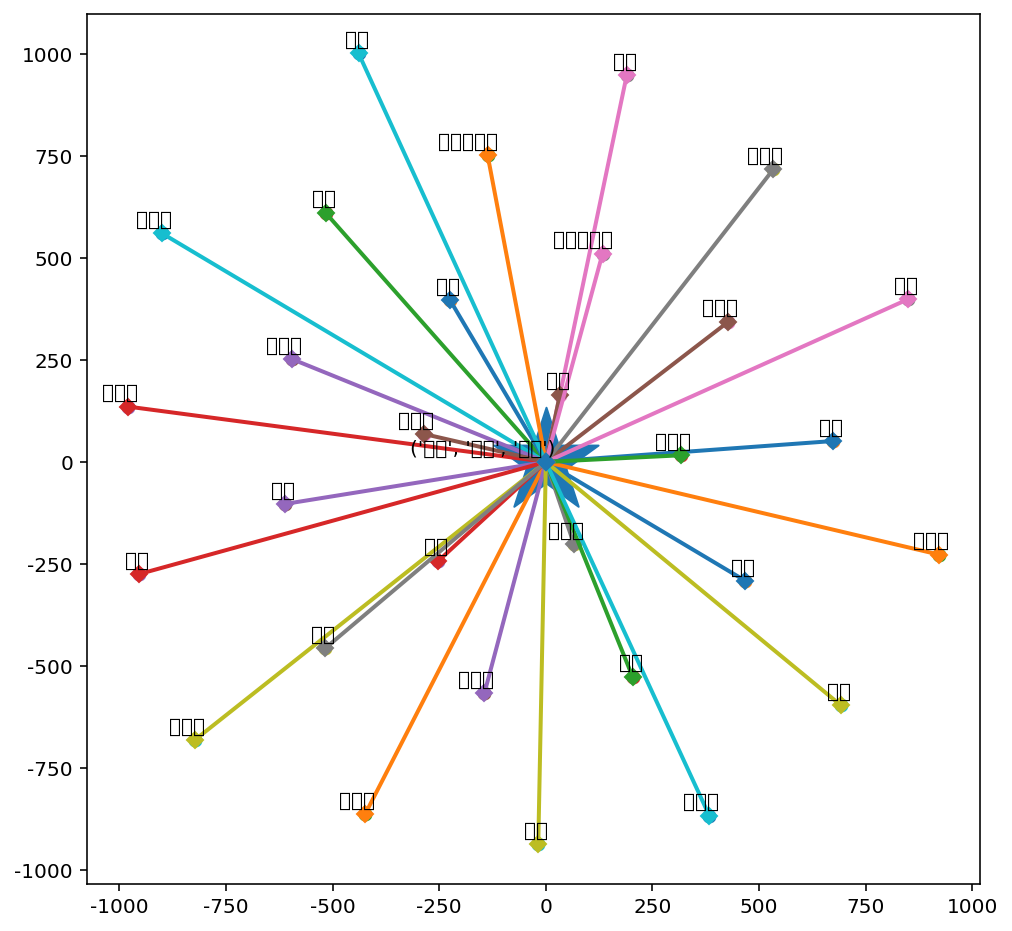

In [51]:
plt.figure(figsize=(8,8))
plt.scatter(0,0,s=3000,marker='*')
for i in range(len(df_xy.x)):
    a = df_xy.loc[[i,30],:]
    plt.plot(a.x,a.y,'-D',linewidth=2)
    plt.scatter(df_xy.x[i],df_xy.y[i])
    plt.annotate(df_xy.word[i],xy=(df_xy.x[i],df_xy.y[i]),xytext=(5,2),textcoords='offset points',ha='right',va='bottom')
plt.scatter
plt.show()